# Importing the Packages

In [1]:
import pandas as pd 
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly import tools
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
import gc
import os
from datetime import datetime 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score
pd.set_option('display.max_columns', 100)

# Data Exploration

In [2]:
data_df = pd.read_csv("data/WA_Fn-UseC_-HR-Employee-Attrition.csv")


# Data Processing

In [3]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
Age                         1470 non-null int64
Attrition                   1470 non-null object
BusinessTravel              1470 non-null object
DailyRate                   1470 non-null int64
Department                  1470 non-null object
DistanceFromHome            1470 non-null int64
Education                   1470 non-null int64
EducationField              1470 non-null object
EmployeeCount               1470 non-null int64
EmployeeNumber              1470 non-null int64
EnvironmentSatisfaction     1470 non-null int64
Gender                      1470 non-null object
HourlyRate                  1470 non-null int64
JobInvolvement              1470 non-null int64
JobLevel                    1470 non-null int64
JobRole                     1470 non-null object
JobSatisfaction             1470 non-null int64
MaritalStatus               1470 non-null object
MonthlyIncome         

In [4]:
objList = data_df.columns
print(objList)

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')


In [5]:
df = data_df.dropna(how = 'any')

In [6]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [7]:
missing_data = df.isnull().sum()
print(missing_data)

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

# EDA - Visualization

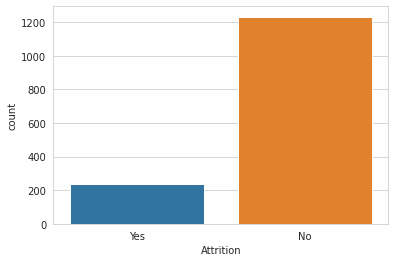

In [113]:
import seaborn as sns
sns.countplot(x="Attrition", data = data_df)

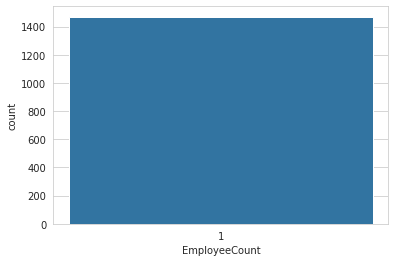

In [28]:
sns.countplot(x="EmployeeCount", data = data_df)

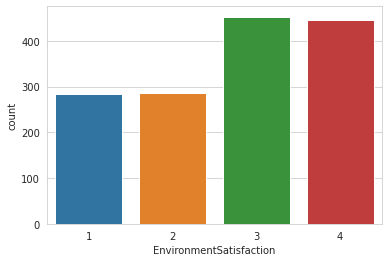

In [29]:
sns.countplot(x="EnvironmentSatisfaction", data = data_df)

In [12]:
temp = data_df["Attrition"].value_counts()
df = pd.DataFrame({'Attrition': temp.index,'values': temp.values})

trace = go.Bar(
    x = df['Attrition'],y = df['values'],
    name="Employee Retension Prediction",
    marker=dict(color="Red"),
    text=df['values']
)
data = [trace]
layout = dict(title = 'Employee Retension Prediction',
          xaxis = dict(title = 'Class', showticklabels=True), 
          yaxis = dict(title = 'Others'),
          hovermode = 'closest',width=600
         )
fig = dict(data=data, layout=layout)
iplot(fig, filename='class')

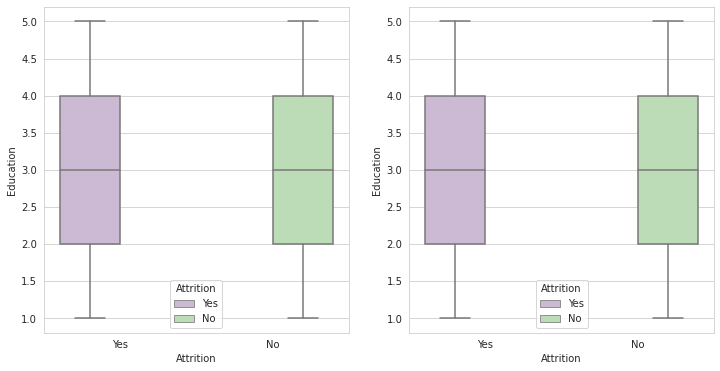

In [23]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
s = sns.boxplot(ax = ax1, x="Attrition", y="Education", hue="Attrition",data=data_df, palette="PRGn",showfliers=True)
s = sns.boxplot(ax = ax2, x="Attrition", y="Education", hue="Attrition",data=data_df, palette="PRGn",showfliers=False)
plt.show()

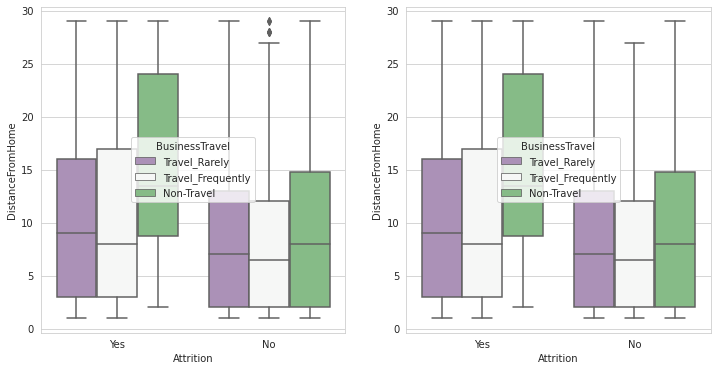

In [24]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
s = sns.boxplot(ax = ax1, x="Attrition", y="DistanceFromHome", hue="BusinessTravel",data=data_df, palette="PRGn",showfliers=True)
s = sns.boxplot(ax = ax2, x="Attrition", y="DistanceFromHome", hue="BusinessTravel",data=data_df, palette="PRGn",showfliers=False)
plt.show()

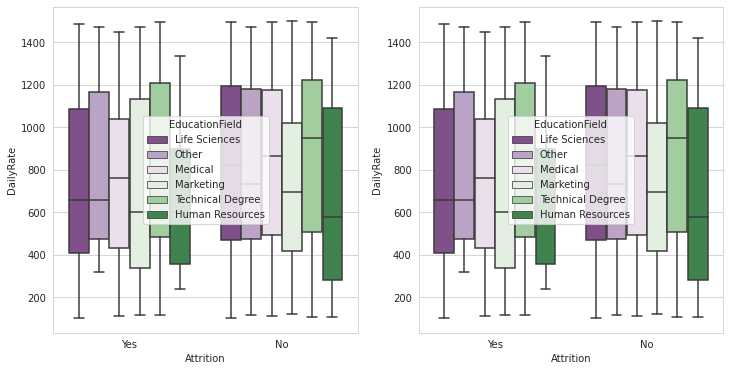

In [25]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
s = sns.boxplot(ax = ax1, x="Attrition", y="DailyRate", hue="EducationField",data=data_df, palette="PRGn",showfliers=True)
s = sns.boxplot(ax = ax2, x="Attrition", y="DailyRate", hue="EducationField",data=data_df, palette="PRGn",showfliers=False)
plt.show()

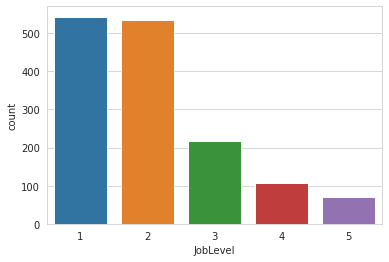

In [31]:
sns.countplot(x="JobLevel", data = data_df)

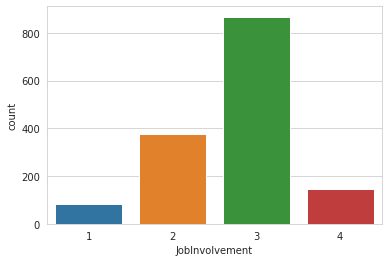

In [114]:
sns.countplot(x="JobInvolvement", data = data_df)

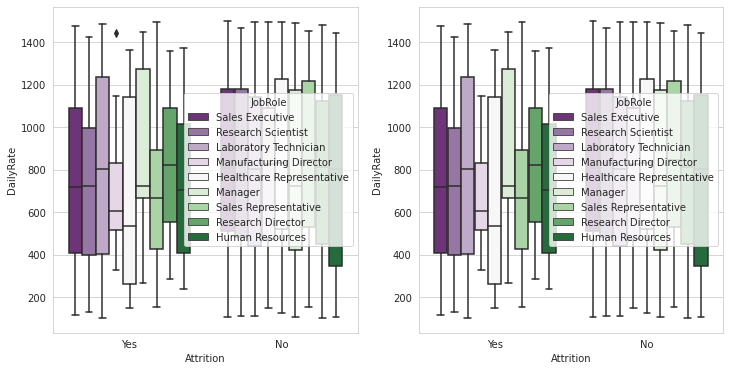

In [38]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
s = sns.boxplot(ax = ax1, x="Attrition", y="DailyRate", hue="JobRole",data=data_df, palette="PRGn",showfliers=True)
s = sns.boxplot(ax = ax2, x="Attrition", y="DailyRate", hue="JobRole",data=data_df, palette="PRGn",showfliers=False)
plt.show()

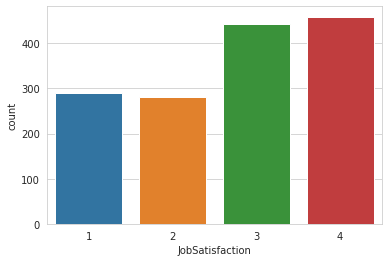

In [39]:
sns.countplot(x="JobSatisfaction", data = data_df)

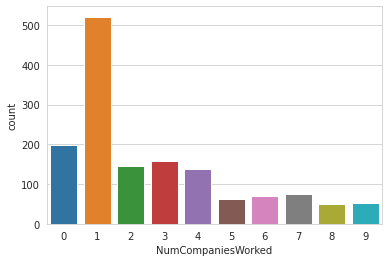

In [41]:
sns.countplot(x="NumCompaniesWorked", data = data_df)

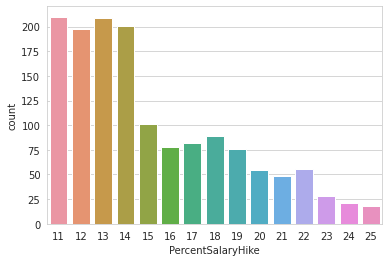

In [42]:
sns.countplot(x="PercentSalaryHike", data = data_df)

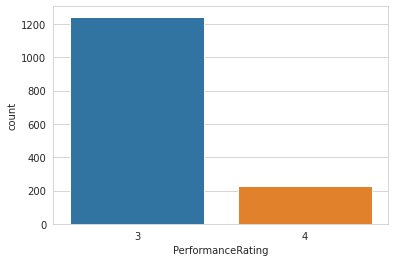

In [43]:
sns.countplot(x="PerformanceRating", data = data_df)

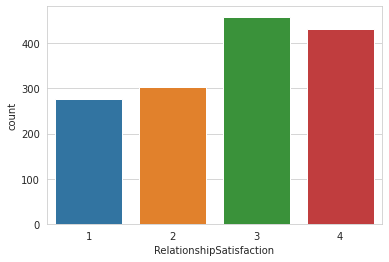

In [44]:
sns.countplot(x="RelationshipSatisfaction", data = data_df)

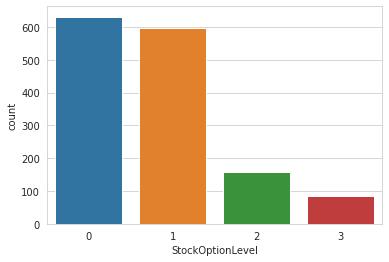

In [46]:
sns.countplot(x="StockOptionLevel", data = data_df)

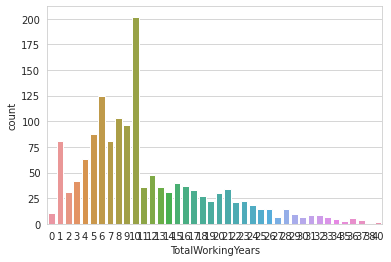

In [47]:
sns.countplot(x="TotalWorkingYears", data = data_df)

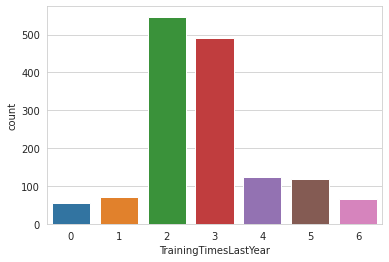

In [48]:
sns.countplot(x="TrainingTimesLastYear", data = data_df)

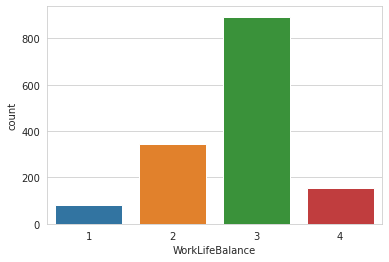

In [50]:
sns.countplot(x="WorkLifeBalance", data = data_df)

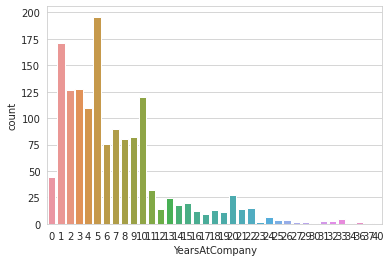

In [51]:
sns.countplot(x="YearsAtCompany", data = data_df)

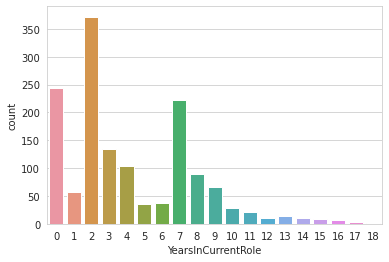

In [52]:
sns.countplot(x="YearsInCurrentRole", data = data_df)

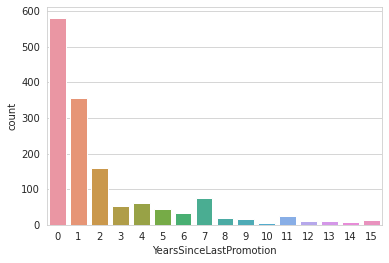

In [53]:
sns.countplot(x="YearsSinceLastPromotion", data = data_df)

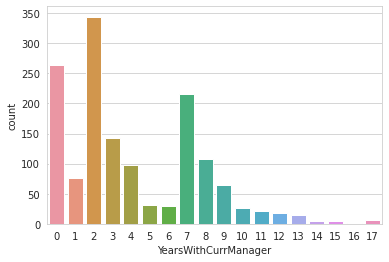

In [54]:
sns.countplot(x="YearsWithCurrManager", data = data_df)

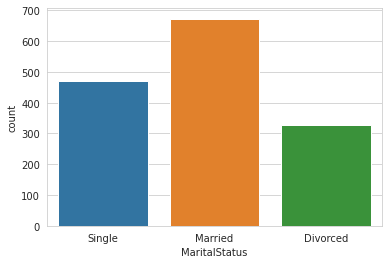

In [59]:
sns.countplot(x="MaritalStatus", data = data_df)

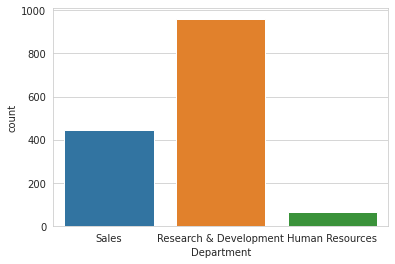

In [60]:
sns.countplot(x="Department", data = data_df)

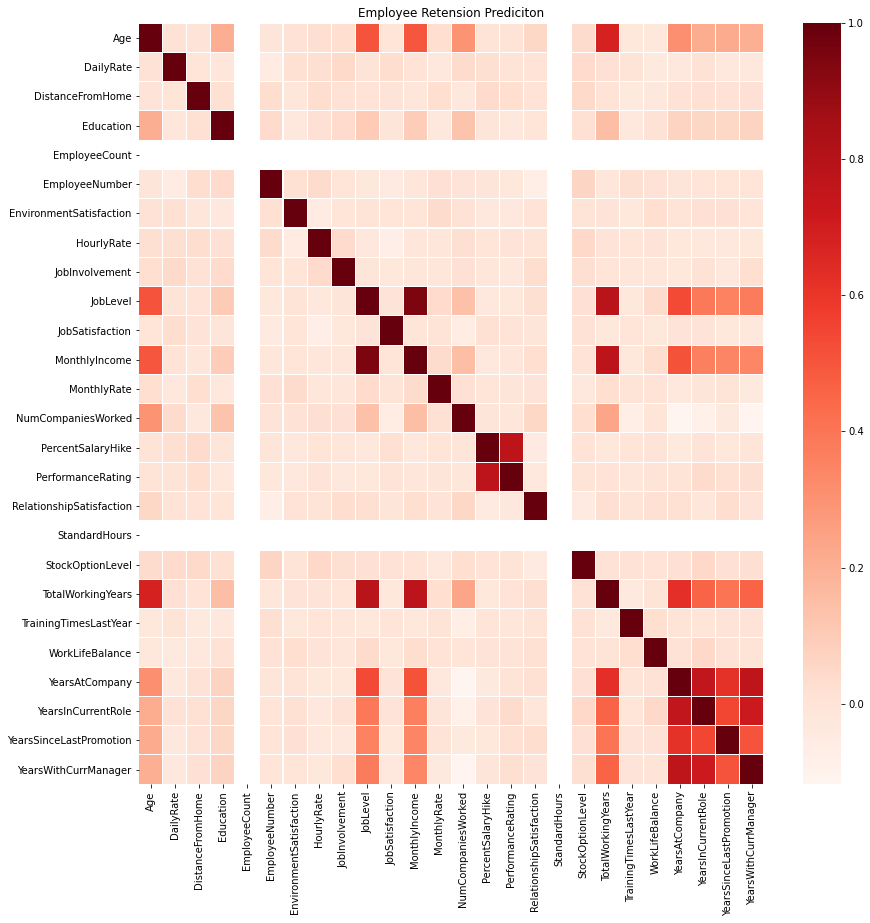

In [15]:
plt.figure(figsize = (14,14))
plt.title('Employee Retension Prediciton')
corr = data_df.corr()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,linewidths=.1,cmap="Reds")
plt.show()

# Data Processing

In [18]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
Age                         1470 non-null int64
Attrition                   1470 non-null object
BusinessTravel              1470 non-null object
DailyRate                   1470 non-null int64
Department                  1470 non-null object
DistanceFromHome            1470 non-null int64
Education                   1470 non-null int64
EducationField              1470 non-null object
EmployeeCount               1470 non-null int64
EmployeeNumber              1470 non-null int64
EnvironmentSatisfaction     1470 non-null int64
Gender                      1470 non-null object
HourlyRate                  1470 non-null int64
JobInvolvement              1470 non-null int64
JobLevel                    1470 non-null int64
JobRole                     1470 non-null object
JobSatisfaction             1470 non-null int64
MaritalStatus               1470 non-null object
MonthlyIncome         

In [55]:
data = data_df[['Attrition', 'Age','BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager']]

In [56]:
data.head()

,Attrition,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,Yes,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,No,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,Yes,37,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,No,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,No,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [57]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
Attrition                   1470 non-null object
Age                         1470 non-null int64
BusinessTravel              1470 non-null object
DailyRate                   1470 non-null int64
Department                  1470 non-null object
DistanceFromHome            1470 non-null int64
Education                   1470 non-null int64
EducationField              1470 non-null object
EmployeeCount               1470 non-null int64
EmployeeNumber              1470 non-null int64
EnvironmentSatisfaction     1470 non-null int64
Gender                      1470 non-null object
HourlyRate                  1470 non-null int64
JobInvolvement              1470 non-null int64
JobLevel                    1470 non-null int64
JobRole                     1470 non-null object
JobSatisfaction             1470 non-null int64
MaritalStatus               1470 non-null object
MonthlyIncome         

# Label Encoding

In [76]:
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
data['Attrition']= label_encoder.fit_transform(data['Attrition'])
data['BusinessTravel']= label_encoder.fit_transform(data['BusinessTravel'])
data['Department']= label_encoder.fit_transform(data['Department'])
data['EducationField']= label_encoder.fit_transform(data['EducationField'])
data['EnvironmentSatisfaction']= label_encoder.fit_transform(data['EnvironmentSatisfaction'])
data['JobRole']= label_encoder.fit_transform(data['JobRole'])
data['MaritalStatus']= label_encoder.fit_transform(data['MaritalStatus'])
data['Over18']= label_encoder.fit_transform(data['Over18'])
data['OverTime']= label_encoder.fit_transform(data['OverTime'])
data['Gender']= label_encoder.fit_transform(data['Gender'])

data['Attrition'].unique()
data['BusinessTravel'].unique()
data['Department'].unique()
data['EducationField'].unique()
data['EnvironmentSatisfaction'].unique()
data['JobRole'].unique()
data['MaritalStatus'].unique()
data['Over18'].unique()
data['OverTime'].unique()
data['Gender'].unique()

array([0, 1])

In [77]:
print(data.shape)

(1470, 35)


# Feature Selection

In [78]:
X = data.iloc[:, 1:35]
y = data.iloc[:,0]

In [79]:
X.shape

(1470, 34)

In [80]:
y.shape

(1470,)

In [81]:
X

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,2,1102,2,1,2,1,1,1,1,0,94,3,2,7,4,2,5993,19479,8,0,1,11,3,1,80,0,8,0,1,6,4,0,5
1,49,1,279,1,8,1,1,1,2,2,1,61,2,2,6,2,1,5130,24907,1,0,0,23,4,4,80,1,10,3,3,10,7,1,7
2,37,2,1373,1,2,2,4,1,4,3,1,92,2,1,2,3,2,2090,2396,6,0,1,15,3,2,80,0,7,3,3,0,0,0,0
3,33,1,1392,1,3,4,1,1,5,3,0,56,3,1,6,3,1,2909,23159,1,0,1,11,3,3,80,0,8,3,3,8,7,3,0
4,27,2,591,1,2,1,3,1,7,0,1,40,3,1,2,2,1,3468,16632,9,0,0,12,3,4,80,1,6,3,3,2,2,2,2
5,32,1,1005,1,2,2,1,1,8,3,1,79,3,1,2,4,2,3068,11864,0,0,0,13,3,3,80,0,8,2,2,7,7,3,6
6,59,2,1324,1,3,3,3,1,10,2,0,81,4,1,2,1,1,2670,9964,4,0,1,20,4,1,80,3,12,3,2,1,0,0,0
7,30,2,1358,1,24,1,1,1,11,3,1,67,3,1,2,3,0,2693,13335,1,0,0,22,4,2,80,1,1,2,3,1,0,0,0
8,38,1,216,1,23,3,1,1,12,3,1,44,2,3,4,3,2,9526,8787,0,0,0,21,4,2,80,0,10,2,3,9,7,1,8
9,36,2,1299,1,27,3,3,1,13,2,1,94,3,2,0,3,1,5237,16577,6,0,0,13,3,2,80,2,17,3,2,7,7,7,7


In [82]:
y

0       1
1       0
2       1
3       0
4       0
5       0
6       0
7       0
8       0
9       0
10      0
11      0
12      0
13      0
14      1
15      0
16      0
17      0
18      0
19      0
20      0
21      1
22      0
23      0
24      1
25      0
26      1
27      0
28      0
29      0
       ..
1440    0
1441    0
1442    1
1443    0
1444    1
1445    0
1446    0
1447    0
1448    0
1449    0
1450    0
1451    0
1452    1
1453    0
1454    0
1455    0
1456    0
1457    0
1458    0
1459    0
1460    0
1461    1
1462    0
1463    0
1464    0
1465    0
1466    0
1467    0
1468    0
1469    0
Name: Attrition, Length: 1470, dtype: int64

# Data Splitting & Scaling

In [83]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [84]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

# RandomForestClassifier

In [85]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier()
RF.fit(X_train, y_train)
predictions = RF.predict(X_test)
print("*Confusion Matrix for RF: ")
print(confusion_matrix(y_test, predictions))

*Confusion Matrix for RF: 
[[297   3]
 [ 60   8]]


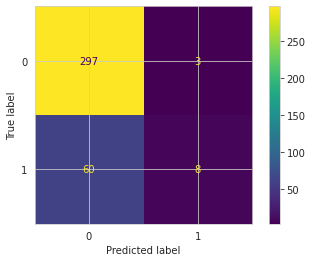

In [91]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, predictions, labels=RF.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=RF.classes_)
disp.plot()
plt.show()

In [92]:
val1 = accuracy_score(y_test, predictions) *100
print("*Classification Report for RF: ")
print(classification_report(y_test, predictions))

*Classification Report for RF: 
              precision    recall  f1-score   support

           0       0.83      0.99      0.90       300
           1       0.73      0.12      0.20        68

    accuracy                           0.83       368
   macro avg       0.78      0.55      0.55       368
weighted avg       0.81      0.83      0.77       368



# Decision Tree Classifier

In [93]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier(random_state=42)
DT.fit(X_train, y_train)
predictions = DT.predict(X_test)
print("*Confusion Matrix for DT: ")
print(confusion_matrix(y_test, predictions))

*Confusion Matrix for DT: 
[[259  41]
 [ 45  23]]


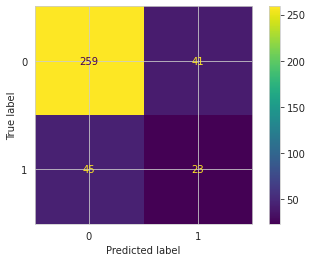

In [94]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, predictions, labels=DT.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=DT.classes_)
disp.plot()
plt.show()

In [95]:
val2 = accuracy_score(y_test, predictions) *100
print("*Classification Report for DT: ")
print(classification_report(y_test, predictions))

*Classification Report for DT: 
              precision    recall  f1-score   support

           0       0.85      0.86      0.86       300
           1       0.36      0.34      0.35        68

    accuracy                           0.77       368
   macro avg       0.61      0.60      0.60       368
weighted avg       0.76      0.77      0.76       368



# KNeighborsClassifier

In [96]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
k_range = list(range(1, 31))
param_grid = dict(n_neighbors=k_range)
knn = KNeighborsClassifier(n_neighbors=3)
# defining parameter range
neigh = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy', return_train_score=False,verbose=1)

neigh.fit(X_train, y_train)
predictions = neigh.predict(X_test)
print("*Confusion Matrix for KNN: ")
print(confusion_matrix(y_test, predictions))

Fitting 10 folds for each of 30 candidates, totalling 300 fits
*Confusion Matrix for KNN: 
[[299   1]
 [ 68   0]]


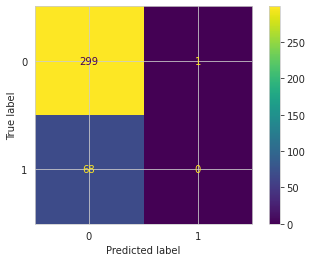

In [97]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, predictions, labels=neigh.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=neigh.classes_)
disp.plot()
plt.show()

In [98]:
val3 = accuracy_score(y_test, predictions) *100
print("*Classification Report for KNN: ")
print(classification_report(y_test, predictions))

*Classification Report for KNN: 
              precision    recall  f1-score   support

           0       0.81      1.00      0.90       300
           1       0.00      0.00      0.00        68

    accuracy                           0.81       368
   macro avg       0.41      0.50      0.45       368
weighted avg       0.66      0.81      0.73       368



# MLP Classifier

In [99]:
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier

mlp_clf = MLPClassifier(hidden_layer_sizes=(150,100,50),
                        max_iter = 300,activation = 'relu',
                        solver = 'adam')

mlp_clf.fit(X_train, y_train)
predictions = mlp_clf.predict(X_test)
print("*Confusion Matrix for MLP: ")
print(confusion_matrix(y_test, predictions))

*Confusion Matrix for MLP: 
[[197 103]
 [ 52  16]]


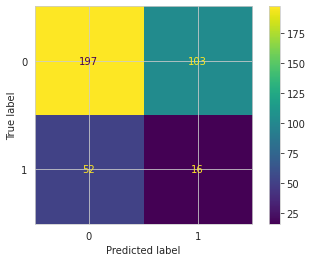

In [100]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, predictions, labels=mlp_clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=mlp_clf.classes_)
disp.plot()
plt.show()

In [101]:
val4 = accuracy_score(y_test, predictions) *100
print("*Classification Report for MLP: ")
print(classification_report(y_test, predictions))

*Classification Report for MLP: 
              precision    recall  f1-score   support

           0       0.79      0.66      0.72       300
           1       0.13      0.24      0.17        68

    accuracy                           0.58       368
   macro avg       0.46      0.45      0.44       368
weighted avg       0.67      0.58      0.62       368



# Voting Clasifier - Ensemble Method

In [102]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB 
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.ensemble import VotingClassifier

knn = KNeighborsClassifier()
gnb = GaussianNB()
rf = RandomForestClassifier()
lr = LogisticRegression(solver='lbfgs', max_iter=10000)
classifiers = [('knn', knn),
               ('gnb', gnb),
               ('rf', rf),
               ('lr', lr)]
vc = VotingClassifier(estimators=classifiers, voting='hard')

In [103]:
params = {'voting':['hard', 'soft'],
          'weights':[(1,1,1,1), (2,1,1,1), (1,2,1,1), (1,1,2,1), (1,1,1,2)]}
grid = GridSearchCV(estimator=vc, param_grid=params, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)
predictions = grid.predict(X_test)
print("*Confusion Matrix for VOTING: ")
print(confusion_matrix(y_test, predictions))

KeyboardInterrupt: 

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, predictions, labels=grid.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=grid.classes_)
disp.plot()
plt.show()

In [104]:
val5 = accuracy_score(y_test, predictions) *100
print("*Classification Report for VOTING: ")
print(classification_report(y_test, predictions))

*Classification Report for VOTING: 
              precision    recall  f1-score   support

           0       0.79      0.66      0.72       300
           1       0.13      0.24      0.17        68

    accuracy                           0.58       368
   macro avg       0.46      0.45      0.44       368
weighted avg       0.67      0.58      0.62       368



# **Model Comparison**

# **Accuracy**

In [108]:
score = [val1,val2,val3,val4,val5]

In [109]:
#make variabel for save the result and to show it
classifier = ('Random Forest','Decision Tree','KNN','MLP CLassifier','Voting Classifier')
y_pos = np.arange(len(classifier))
print(y_pos)
print(score)

[0 1 2 3 4]
[82.88043478260869, 76.63043478260869, 81.25, 57.88043478260869, 57.88043478260869]


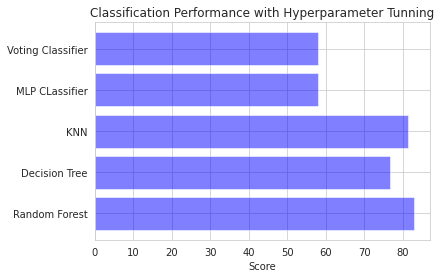

In [110]:
import matplotlib.pyplot as plt2
plt2.barh(y_pos, score, align='center', alpha=0.5,color='blue')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Score')
plt2.title('Classification Performance with Hyperparameter Tunning')
plt2.show()

# **ROC Score**

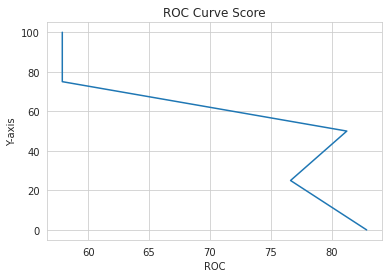

In [111]:
import matplotlib.pyplot as plt
import numpy as np
  
  
x = np.array([val1,val2,val3,val4,val5])
y = [0, 25,50,75,100]
  
plt.plot(x, y)
plt.xlabel("ROC")
plt.ylabel("Y-axis")
plt.title("ROC Curve Score")
plt.show()  # show first chart

  
# Show another chart with '-' dotted line
plt.show()

# **Accuracy vs ROC**

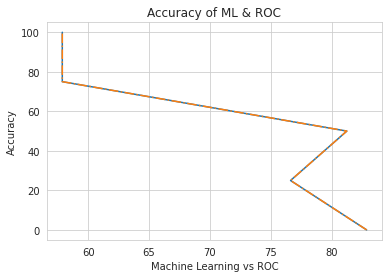

In [112]:
import matplotlib.pyplot as plt
import numpy as np
  
x = np.array([val1,val2,val3,val4,val5])
y = [0,25,50,75,100]
  
# first plot with X and Y data
plt.plot(x, y)
  
x1 = np.array([val1,val2,val3,val4,val5])
y1 = [0,25,50,75,100]
  
# second plot with x1 and y1 data
plt.plot(x1, y1, '-.')
  
plt.xlabel("Machine Learning vs ROC")
plt.ylabel("Accuracy")
plt.title('Accuracy of ML & ROC')
plt.show()